<a href="https://www.kaggle.com/code/hoshimmardonov1/avia-chiptani-bashorati?scriptVersionId=128039607" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics 

<h1>Avia chipta narxlarini bashorat qilish
</h1>

Datasetlarni yuklab olamiz

In [2]:
training_set = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/train_data.csv")
test_set = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/test_data.csv")

Datasetlarni o'qiymiz

In [3]:
training_set.head(5)

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


Data set bo'yicha umumiy ma'lumotlarni chiqaramiz

In [4]:
# Qatorlar sonini tekshirish
print("\n\nDatasetlarning qatorlar soni :\n",'#' * 40)

print("\nTraining Set : ",len(training_set))
print("Test Set : ",len(test_set))

# Datasetlarning ustunlar sonini tekshirish
print("\n\nDatasetlarning ustunlar soni :\n",'#' * 40)

print("\nTraining Set : ",len(training_set.columns))
print("Test Set : ",len(test_set.columns))

# Datasetning ustunlari nomini tekshirish
print("\n\nDatasetning ustunlari nomi :\n",'#' * 40)

print("\nTraining Set : ", list(training_set.columns))
print("Test Set : ",list(test_set.columns))

# Data setlarning ustunlari data turini tekshirish
print("\n\nDataset ustunlari turi :\n",'#' * 40)

print("\nTraining Set : ", training_set.dtypes)
print("\nTest Set : ",test_set.dtypes)

# NaN qiymat yoki bo'sh yachaykalarni tekshirish
print("\n\nNaN qiymat yoki bo'sh yachaykalar :\n",'#' * 40)

print("\nTraining Set : ",training_set.isnull().values.any())
print("\nTest Set : ",test_set.isnull().values.any())

#Dataset umumiy ma'lumotlari
print("\n\nInfo:\n",'#' * 40)

training_set.info()



Datasetlarning qatorlar soni :
 ########################################

Training Set :  20000
Test Set :  5000


Datasetlarning ustunlar soni :
 ########################################

Training Set :  12
Test Set :  11


Datasetning ustunlari nomi :
 ########################################

Training Set :  ['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']
Test Set :  ['id', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left']


Dataset ustunlari turi :
 ########################################

Training Set :  id                    int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left         

<h2>Kategorikal ustunlarni ajratish</h2>

In [5]:
print(f"Raqamli ustunlar: \n {training_set.select_dtypes(['int','float']).columns} \n")
print(f"Harfli ustunlar: \n {training_set.select_dtypes('object').columns}")

Raqamli ustunlar: 
 Index(['id', 'duration', 'days_left', 'price'], dtype='object') 

Harfli ustunlar: 
 Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class'],
      dtype='object')


Harfli ustunlardagi takrorlanmas qiymatlarni ajratish

In [6]:
airlines = list(training_set.airline) + list(test_set.airline)

flights = list(training_set.flight) + list(test_set.flight)

source_cities = list(training_set.source_city) + list(test_set.source_city)

departure_times = list(training_set.departure_time) + list(test_set.departure_time)

stops = list(training_set.stops) + list(test_set.stops)

arrival_times = list(training_set.arrival_time) + list(test_set.arrival_time)

destination_cities = list(training_set.destination_city) + list(test_set.destination_city)

classes = list(training_set['class']) + list(test_set['class'])



print("\nAirlanes ustunidagi jami takrorlanmas qymatlar soni  : \n ", len(set(airlines)))
print("\nAirlanes ustunidagi  takrorlanmas qymatlar  : \n ", set(airlines))

print("\nFlights ustunidagi jami takrorlanmas qymatlar soni: \n ", len(set(flights)))
# print("\nTFlights ustunidagi takrorlanmas qymatlar : \n ", set(flights) )

print("\nSource_cities ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(source_cities)))
print("\nSource_cities ustunidagi  takrorlanmas qymatlar : \n ", set(source_cities) )

print("\nDeparture_time ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(departure_times)))
print("\nDeparture_time ustunidagi takrorlanmas qymatlar : \n ", set(departure_times) )

print("\nStops ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(stops)))
print("\nStops ustunidagi  takrorlanmas qymatlar : \n ", set(stops) )

print("\nArrival_time ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(arrival_times)))
print("\nArrival_time ustunidagi  takrorlanmas qymatlar : \n ", set(arrival_times) )

print("\nDestination_citiy ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(destination_cities)))
print("\nDestination_citiy ustunidagi  takrorlanmas qymatlar : \n ", set(destination_cities) )

print("\nClass ustunidagi jami takrorlanmas qymatlar soni : \n ", len(set(classes)))
print("\nClass ustunidagi  takrorlanmas qymatlar : \n ", set(classes) )


Airlanes ustunidagi jami takrorlanmas qymatlar soni  : 
  6

Airlanes ustunidagi  takrorlanmas qymatlar  : 
  {'Indigo', 'Vistara', 'SpiceJet', 'AirAsia', 'Air_India', 'GO_FIRST'}

Flights ustunidagi jami takrorlanmas qymatlar soni: 
  1345

Source_cities ustunidagi jami takrorlanmas qymatlar soni : 
  6

Source_cities ustunidagi  takrorlanmas qymatlar : 
  {'Delhi', 'Bangalore', 'Mumbai', 'Hyderabad', 'Chennai', 'Kolkata'}

Departure_time ustunidagi jami takrorlanmas qymatlar soni : 
  6

Departure_time ustunidagi takrorlanmas qymatlar : 
  {'Early_Morning', 'Late_Night', 'Night', 'Evening', 'Morning', 'Afternoon'}

Stops ustunidagi jami takrorlanmas qymatlar soni : 
  3

Stops ustunidagi  takrorlanmas qymatlar : 
  {'two_or_more', 'one', 'zero'}

Arrival_time ustunidagi jami takrorlanmas qymatlar soni : 
  6

Arrival_time ustunidagi  takrorlanmas qymatlar : 
  {'Early_Morning', 'Late_Night', 'Night', 'Evening', 'Morning', 'Afternoon'}

Destination_citiy ustunidagi jami takrorlanmas 

In [7]:
training_set.nunique()

id                  20000
airline                 6
flight               1310
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              404
days_left              49
price                4420
dtype: int64

In [8]:
for col in training_set:
    if training_set[col].dtype == 'object':
        print(training_set[col].unique())

['Vistara' 'SpiceJet' 'Indigo' 'Air_India' 'GO_FIRST' 'AirAsia']
['UK-810' 'SG-5094' 'UK-846' ... 'AI-489' 'G8-213' '6E-7201']
['Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Delhi' 'Mumbai']
['Early_Morning' 'Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['one' 'zero' 'two_or_more']
['Night' 'Evening' 'Morning' 'Afternoon' 'Early_Morning' 'Late_Night']
['Mumbai' 'Kolkata' 'Delhi' 'Hyderabad' 'Chennai' 'Bangalore']
['Economy' 'Business']


* Aviakompaniyalar ustunida 6 ta noyob aviakompaniyalar mavjud: 
    'Vistara' 'SpiceJet' 'Indigo' 'Air_India' 'GO_FIRST' 'AirAsia'
* source_city va destination_city-da 6 ta noyob shahar mavjud: 
    'Bangalore' 'Hyderabad' 'Kolkata' 'Chennai' 'Delhi' 'Mumbai'
* Ketish va kelish ustunlarida 6 xil vaqt bor: 
   'Early_Morning' 'Evening' 'Morning' 'Afternoon' 'Night' 'Late_Night'
* Class ustunida 2 xil sinf mavjud: 
    Ekonom, Biznes

Takrorlangan qiymatlarni tekshiramiz agar mavjud bo'lsa tashlab yuboramiz(ya'ni buning uchun avval id ustunini tashlab yuboramiz) 

In [9]:
training_set.drop(['id'], axis=1, inplace=True)
training_set.drop(['flight'], axis=1, inplace=True)

In [10]:
training_set

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,Vistara,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,Vistara,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,Indigo,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,Indigo,Bangalore,Night,one,Early_Morning,Mumbai,Economy,7.92,45,3153
19996,AirAsia,Kolkata,Morning,one,Afternoon,Delhi,Economy,5.83,24,3911
19997,Vistara,Chennai,Early_Morning,two_or_more,Evening,Bangalore,Economy,35.33,17,14822
19998,Vistara,Mumbai,Evening,one,Morning,Bangalore,Economy,16.33,21,6450


<h2>1. Har bir aviakompaniya qancha reyslarni amalga oshiradi?</h2>

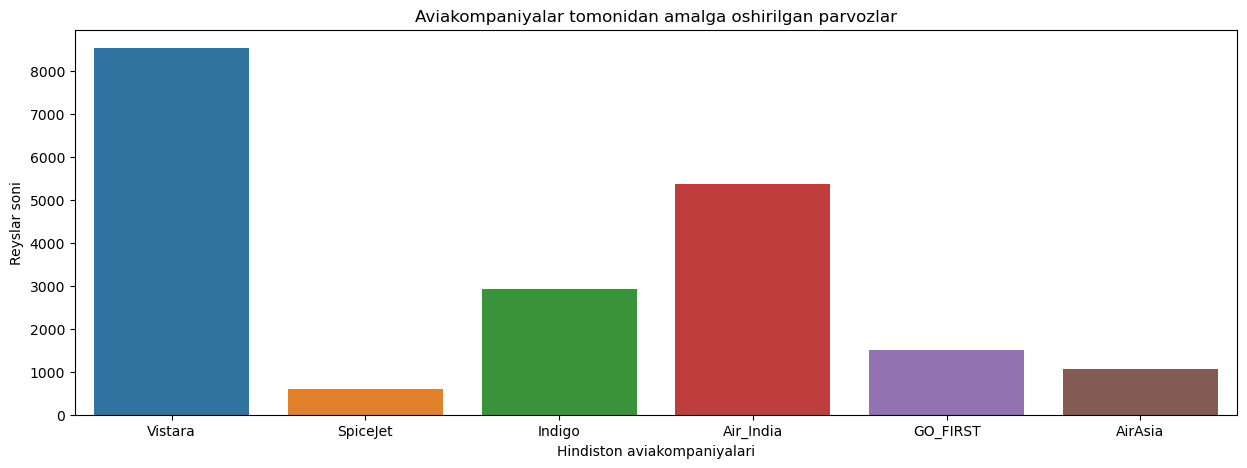

In [11]:
from turtle import title
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline', data = training_set)
NF.set(xlabel='Hindiston aviakompaniyalari', ylabel='Reyslar soni', title='Aviakompaniyalar tomonidan amalga oshirilgan parvozlar')
plt.show(NF)

Yuqoridagi rasmdan biz "Vistara" ning maksimal raqamga ega ekanligini ko'rishimiz mumkin. Reyslar soni bo'yicha "Air Asia", keyin esa "Spice Jet" eng kam reyslarga ega.

<h2>2. Sayohat sinfiga ko'ra narx oralig'i qanday?</h2>

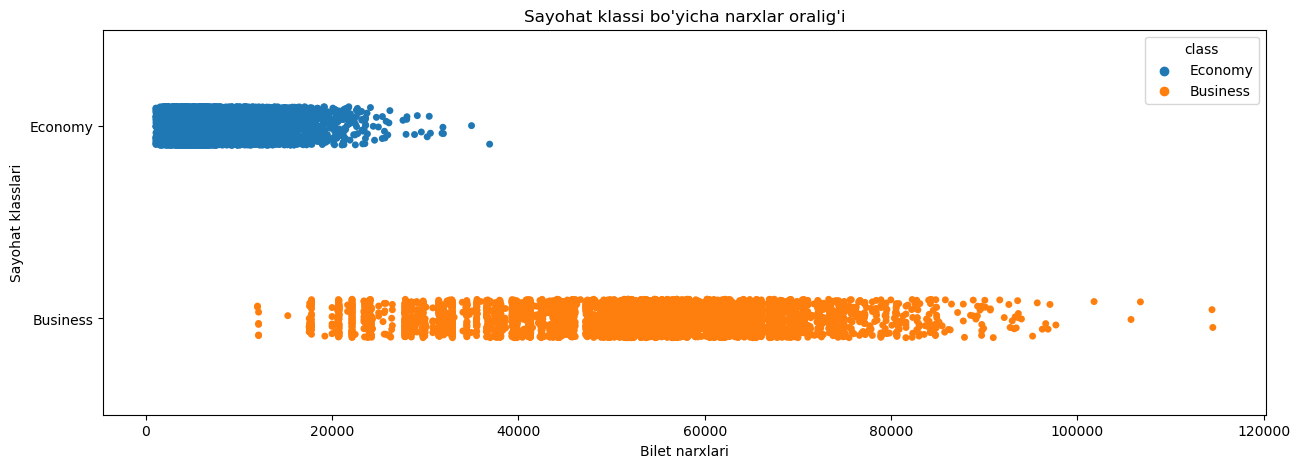

In [12]:
from turtle import title
plt.figure(figsize=(15,5))
CE = sns.stripplot(x='price', y='class',hue="class", data = training_set)
CE.set(xlabel='Bilet narxlari', ylabel='Sayohat klasslari', title="Sayohat klassi bo'yicha narxlar oralig'i")
plt.show(CE)

Yuqoridagi rasmdan biz "ekonom" toifasidagi chiptalar narxi odatda 2500 - 20000, "biznes" toifasi esa 30000 - 85000 orasida ekanligini ko'rishimiz mumkin.

<h2>3. Sayohat sinfiga ko'ra Chiptalarning mavjudligi qanday?</h2>

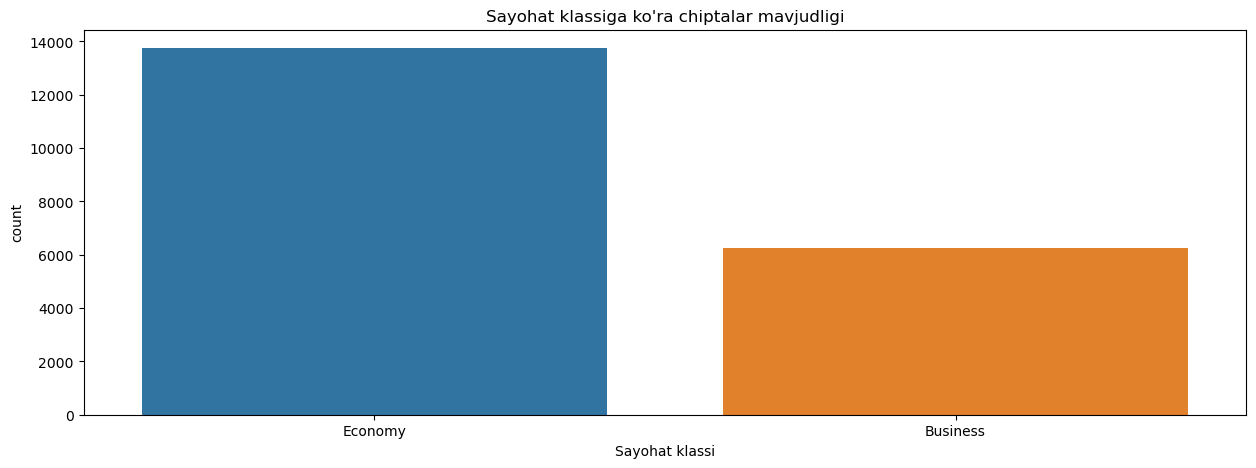

In [13]:
from turtle import title
plt.figure(figsize=(15,5))
TA = sns.countplot(x='class', data = training_set)
TA.set(xlabel='Sayohat klassi', title="Sayohat klassiga ko'ra chiptalar mavjudligi")
plt.show(TA)

Yuqoridagi rasmdan biz “ekonom” chiptalarining mavjudligi “Biznes” toifasidagi chiptalardan deyarli uch baravar ko‘p ekanligini ko‘rishimiz mumkin, bu esa faqat ikkita aviakompaniya – “Air India, Vistara” “Ekonom” toifasidagi chiptalarni taklif qilishi bilan izohlanadi.

<h2>4. Har xil aviakompaniyalar uchun chipta narxi parvoz davomiyligiga qarab qancha turadi?</h2>

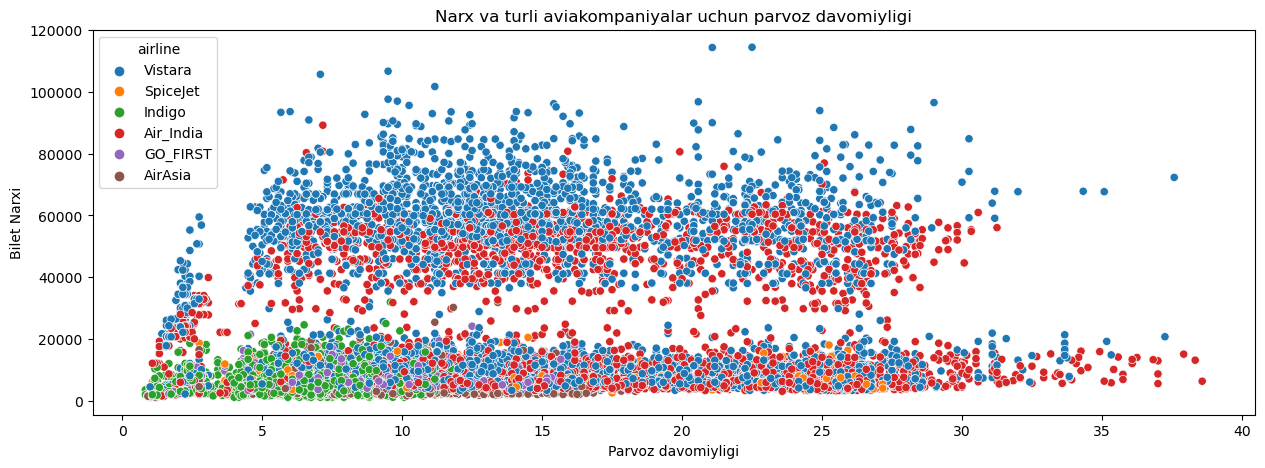

In [14]:
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x=training_set['duration'], y=training_set['price'], hue= training_set['airline'])
PD.set(xlabel='Parvoz davomiyligi', ylabel='Bilet Narxi', title='Narx va turli aviakompaniyalar uchun parvoz davomiyligi')
plt.show(PD)

Yuqoridagi rasmdan biz chipta narxining taqsimlanishi parvoz davomiyligiga qarab o'zgarib borayotganini ko'ramiz. Rasmdagi ko'k va qizil nuqtalarning ko'proq soni "Vistara" va "Air India" ning maksimal reyslar soniga ega ekanligi bilan izohlanadi.

<h2>5. Turli aviakompaniyalar va sayohat sinfida chiptalar narxi qanday farqlanadi?</h2>

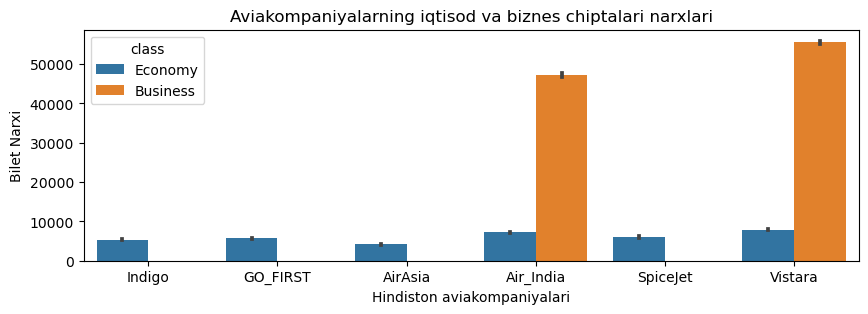

In [15]:
plt.figure(figsize=(10,3))
AS = sns.barplot(x='airline', y='price', hue='class', data = training_set.sort_values('price'))
AS.set(xlabel='Hindiston aviakompaniyalari', ylabel='Bilet Narxi', title='Aviakompaniyalarning iqtisod va biznes chiptalari narxlari')
plt.show(AS)

Yuqoridagi raqamdan xulosa qilishimiz mumkinki, "Air Asia" eng arzon "ekonom" klass chiptalarini taklif qiladi, "Indigo", "Go First", "Spice Jet" esa deyarli bir xil narxlarda. Shu bilan birga, "Air India" va "Vistara" boshqa to'rtta aviakompaniyaga qaraganda ancha yuqori.

<h2>6. Aviachiptalar narxi ularni qachon sotib olishingizga qarab qanday o'zgaradi?</h2>

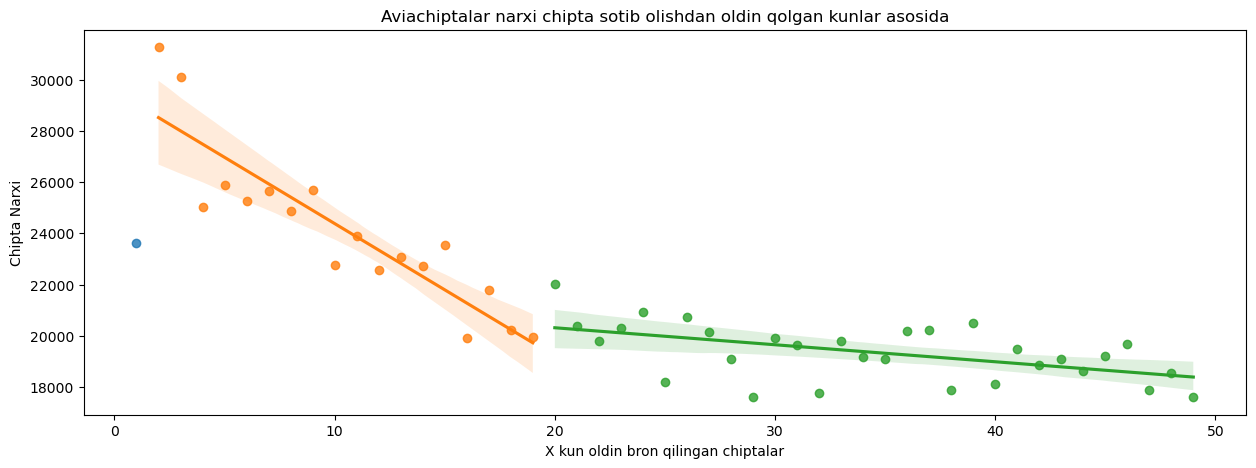

In [16]:
df_temp = training_set.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
ax.set(xlabel='X kun oldin bron qilingan chiptalar', ylabel='Chipta Narxi', title='Aviachiptalar narxi chipta sotib olishdan oldin qolgan kunlar asosida')
plt.show(ax)

Yuqoridagi raqamdan xulosa qilishimiz mumkinki, chiptalar narxi parvoz boshlangan kundan boshlab 20 kungacha asta-sekin ko'tariladi, so'ngra oxirgi kungacha keskin ko'tariladi va parvoz sanasidan atigi 1 kun oldin keskin pasayadi. Buni odamlar odatda parvozdan keyin 2-3 hafta ichida aviachiptalarni sotib olishlari bilan izohlash mumkin, bu esa aviakompaniyalarga ko'proq foyda keltiradi. Oxirgi kunda narxlar keskin pasayganini ko'rsatmoqda, chunki aviakompaniyalar yuk ko'rsatkichini oshirish va har bir yo'lovchining operatsion xarajatlarini kamaytirish hisobiga reysni to'liq to'ldirishga umid qilmoqda.

<h2>7. Chipta narxi parvoz davomiyligiga qarab qanday o'zgaradi?</h2>

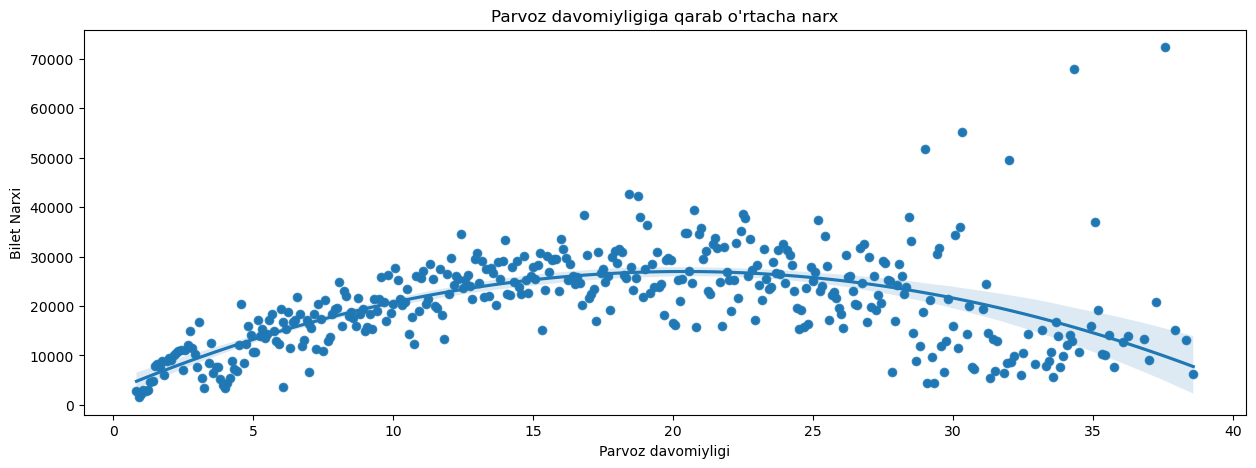

In [17]:
df_temp2 = training_set.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2)
PD = sns.regplot(x='duration', y='price', data = df_temp2, order = 2)
PD.set(xlabel='Parvoz davomiyligi', ylabel='Bilet Narxi', title="Parvoz davomiyligiga qarab o'rtacha narx")
plt.show(PD)

Yuqoridagi rasmdan biz munosabatlar chiziqli emasligini, lekin ikkinchi darajali egri chiziq bilan yaqinlashishi mumkinligini ko'rishimiz mumkin. Biz narxlarning chiziqli o'sishini kuzatishimiz mumkin, chunki parvoz davomiyligi 20 ga ko'tariladi va keyin yana pasayadi. Ba'zi chet elliklar egri chiziqqa ta'sir qilishi mumkin.

<h2>8. Chipta narxi ketish va kelish vaqtiga qarab qanday o'zgaradi?</h2>

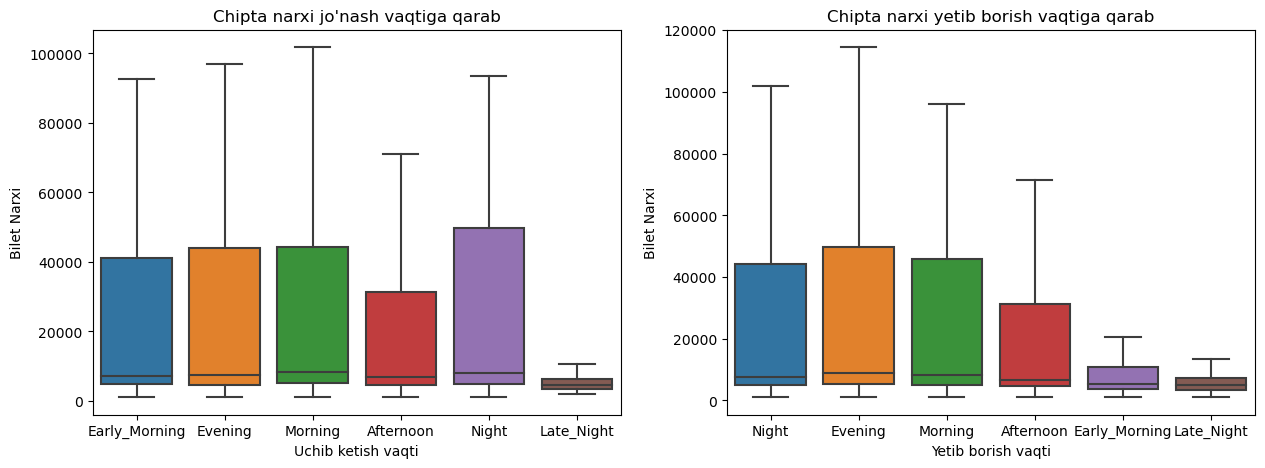

In [18]:
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
sns.boxplot(data = training_set, x = 'departure_time', y = 'price', showfliers = False).set(xlabel = 'Uchib ketish vaqti', ylabel = 'Bilet Narxi', title ="Chipta narxi jo'nash vaqtiga qarab")
plt.subplot (1,2,2)
sns.boxplot(data = training_set, x = 'arrival_time', y = 'price', showfliers =  False).set(xlabel = 'Yetib borish vaqti', ylabel = 'Bilet Narxi', title = "Chipta narxi yetib borish vaqtiga qarab")
plt.show()

<h2>9. To'xtashlar soni va aviakompaniyaga qarab chiptalar narxi qanday o'zgaradi?</h2>

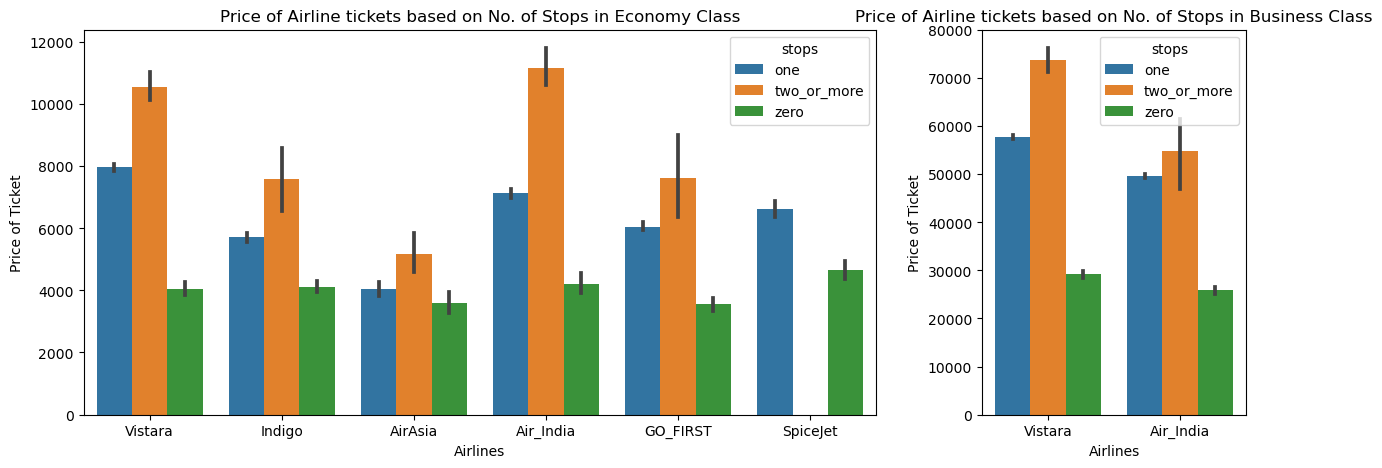

In [19]:
df = training_set
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,1]}, figsize = (15,5))
sns.barplot(y = 'price', x = 'airline', hue = 'stops', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0])
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Economy Class')
sns.barplot(y='price', x='airline', hue='stops', data= df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1])
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig, axs)

Yuqoridagi rasmdan xulosa qilishimiz mumkinki, to'xtovsiz reyslar odatda eng arzon, bir marta to'xtaladigan reyslar qimmatroq va 2+ to'xtash reyslari eng qimmat, bu esa manzilga uchish uchun ko'proq reyslarni amalga oshirish bilan izohlash mumkin. "Air Asia" bu holatda istisno bo'lib ko'rinadi, bu uning to'xtovsiz, bir to'xtash va 2+ to'xtash reyslari o'rtasidagi narxlarda ozgina farqni ko'rsatadi.

<h1>Machine Learningga tayyorgarlik</h1>

<h2>Kategorikal malumotlarni ajratamiz</h2>
<h3>Train data ni tayyorlaymiz</h3>

In [20]:
Airline = df[["airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Airline.head(3)

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,0,1


In [21]:
Source =df[["source_city"]]

Source =pd.get_dummies(Source, drop_first=True)

Source.head(3)

,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,0,0,0,0
1,0,0,1,0,0
2,0,0,0,0,0


In [22]:
Destination =df[["destination_city"]]

Destination =pd.get_dummies(Destination, drop_first=True)

Destination.head(3)

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,0,0,1
1,0,0,0,1,0
2,0,1,0,0,0


In [23]:
Departure_time =df[["departure_time"]]

Departure_time =pd.get_dummies(Departure_time, drop_first=True)

Departure_time.head(3)

,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0


In [24]:
Arrival_time =df[["arrival_time"]]

Arrival_time =pd.get_dummies(Arrival_time, drop_first=True)

Arrival_time.head(3)

,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,0,0,1
1,0,0,0,0,1
2,0,1,0,0,0


In [25]:
df.replace({"zero":0, "one": 1, "two_or_more": 2}, inplace=True)
df.replace({"Economy":0, "Business": 1}, inplace=True)

In [26]:
df

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,Vistara,Bangalore,Early_Morning,1,Night,Mumbai,0,14.25,21,7212
1,SpiceJet,Hyderabad,Evening,0,Night,Kolkata,0,1.75,7,5292
2,Vistara,Bangalore,Morning,1,Evening,Delhi,1,9.58,5,60553
3,Vistara,Kolkata,Morning,1,Evening,Hyderabad,0,6.75,28,5760
4,Indigo,Chennai,Early_Morning,0,Morning,Mumbai,0,2.00,4,10712
...,...,...,...,...,...,...,...,...,...,...
19995,Indigo,Bangalore,Night,1,Early_Morning,Mumbai,0,7.92,45,3153
19996,AirAsia,Kolkata,Morning,1,Afternoon,Delhi,0,5.83,24,3911
19997,Vistara,Chennai,Early_Morning,2,Evening,Bangalore,0,35.33,17,14822
19998,Vistara,Mumbai,Evening,1,Morning,Bangalore,0,16.33,21,6450


In [27]:
data_train =pd.concat([df,Airline,Source,Destination, Departure_time, Arrival_time], axis=1)

In [28]:
data_train.head(3)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,Vistara,Bangalore,Early_Morning,1,Night,Mumbai,0,14.25,21,7212,...,1,0,0,0,0,0,0,0,0,1
1,SpiceJet,Hyderabad,Evening,0,Night,Kolkata,0,1.75,7,5292,...,0,1,0,0,0,0,0,0,0,1
2,Vistara,Bangalore,Morning,1,Evening,Delhi,1,9.58,5,60553,...,0,0,0,1,0,0,1,0,0,0


In [29]:
data_train.shape

(20000, 35)

In [30]:
data_train.drop(["airline","source_city", "departure_time", "arrival_time", "destination_city"], axis=1, inplace=True)

In [31]:
data_train

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,1,0,14.25,21,7212,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1.75,7,5292,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,9.58,5,60553,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
3,1,0,6.75,28,5760,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,0,0,2.00,4,10712,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,0,7.92,45,3153,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
19996,1,0,5.83,24,3911,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19997,2,0,35.33,17,14822,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
19998,1,0,16.33,21,6450,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [32]:
X = data_train.drop("price", axis=1)
y = data_train['price']

In [33]:
X

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,1,0,14.25,21,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1.75,7,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,9.58,5,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,6.75,28,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,0,2.00,4,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,0,7.92,45,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
19996,1,0,5.83,24,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
19997,2,0,35.33,17,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
19998,1,0,16.33,21,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [34]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
X

array([[ 0.19281382, -0.67396452,  0.28952803, ..., -0.2190852 ,
        -0.50671003,  1.50208799],
       [-2.30154354, -0.67396452, -1.45682723, ..., -0.2190852 ,
        -0.50671003,  1.50208799],
       [ 0.19281382,  1.48375764, -0.36291029, ..., -0.2190852 ,
        -0.50671003, -0.66573996],
       ...,
       [ 2.68717119, -0.67396452,  3.23458153, ..., -0.2190852 ,
        -0.50671003, -0.66573996],
       [ 0.19281382, -0.67396452,  0.58012154, ..., -0.2190852 ,
         1.97351529, -0.66573996],
       [ 0.19281382, -0.67396452,  0.84836171, ..., -0.2190852 ,
         1.97351529, -0.66573996]])

In [36]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X,y)

RandomForestRegressor()

<h3>Bashorat qilish uchun test data ni tayyorlaymiz</h3>

In [37]:
test_set.drop(['id', 'flight'], axis=1, inplace=True)
Airline = test_set[["airline"]]
Airline = pd.get_dummies(Airline, drop_first =True)

Airline.head(3)

,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,1,0,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0


In [38]:
Source =test_set[["source_city"]]

Source =pd.get_dummies(Source, drop_first=True)

Source.head(3)

,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,0,0,1


In [39]:
Destination =test_set[["destination_city"]]

Destination =pd.get_dummies(Destination, drop_first=True)

Destination.head(3)

,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,1,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0


In [40]:
Departure_time =test_set[["departure_time"]]

Departure_time =pd.get_dummies(Departure_time, drop_first=True)

Departure_time.head(3)

,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0


In [41]:
Arrival_time =test_set[["arrival_time"]]

Arrival_time =pd.get_dummies(Arrival_time, drop_first=True)

Arrival_time.head(3)

,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,0,0,1
1,0,0,0,0,1
2,1,0,0,0,0


In [42]:
test_set.replace({"zero":0, "one": 1, "two_or_more": 2}, inplace=True)
test_set.replace({"Economy":0, "Business": 1}, inplace=True)

In [43]:
test_set.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Air_India,Kolkata,Evening,1,Night,Delhi,1,28.25,2
1,Vistara,Delhi,Early_Morning,1,Night,Mumbai,1,13.83,34
2,Air_India,Mumbai,Early_Morning,0,Early_Morning,Chennai,1,2.00,30
3,AirAsia,Hyderabad,Night,1,Late_Night,Delhi,0,5.17,26
4,Air_India,Kolkata,Night,1,Afternoon,Mumbai,0,16.33,35


In [44]:
data_test =pd.concat([test_set,Airline,Source,Destination, Departure_time, Arrival_time], axis=1)

In [45]:
data_test

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,airline_Air_India,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,Air_India,Kolkata,Evening,1,Night,Delhi,1,28.25,2,1,...,0,1,0,0,0,0,0,0,0,1
1,Vistara,Delhi,Early_Morning,1,Night,Mumbai,1,13.83,34,0,...,1,0,0,0,0,0,0,0,0,1
2,Air_India,Mumbai,Early_Morning,0,Early_Morning,Chennai,1,2.00,30,1,...,1,0,0,0,0,1,0,0,0,0
3,AirAsia,Hyderabad,Night,1,Late_Night,Delhi,0,5.17,26,0,...,0,0,0,0,1,0,0,1,0,0
4,Air_India,Kolkata,Night,1,Afternoon,Mumbai,0,16.33,35,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Air_India,Kolkata,Afternoon,1,Morning,Bangalore,1,17.42,15,1,...,0,0,0,0,0,0,0,0,1,0
4996,Indigo,Kolkata,Morning,0,Afternoon,Mumbai,0,3.00,40,0,...,0,0,0,1,0,0,0,0,0,0
4997,Air_India,Kolkata,Morning,1,Night,Mumbai,1,11.17,37,1,...,0,0,0,1,0,0,0,0,0,1
4998,Air_India,Mumbai,Early_Morning,1,Night,Hyderabad,1,13.33,38,1,...,1,0,0,0,0,0,0,0,0,1


In [46]:
data_test.drop(["airline","source_city", "departure_time", "arrival_time", "destination_city"], axis=1, inplace=True)

In [47]:
data_test

,stops,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,1,1,28.25,2,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,13.83,34,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,2.00,30,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1,0,5.17,26,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,1,0,16.33,35,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,1,17.42,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4996,0,0,3.00,40,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4997,1,1,11.17,37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4998,1,1,13.33,38,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [48]:
scaler = StandardScaler()
X_test = scaler.fit_transform(data_test)

In [49]:
X_test

array([[ 0.20037687,  1.50810949,  2.17930407, ..., -0.21453462,
        -0.51402578,  1.5202823 ],
       [ 0.20037687,  1.50810949,  0.20548051, ..., -0.21453462,
        -0.51402578,  1.5202823 ],
       [-2.38179933,  1.50810949, -1.41382134, ..., -0.21453462,
        -0.51402578, -0.65777257],
       ...,
       [ 0.20037687,  1.50810949, -0.15862287, ..., -0.21453462,
        -0.51402578,  1.5202823 ],
       [ 0.20037687,  1.50810949,  0.13704002, ..., -0.21453462,
        -0.51402578,  1.5202823 ],
       [ 0.20037687,  1.50810949,  0.51346269, ..., -0.21453462,
        -0.51402578, -0.65777257]])

In [50]:
y_pred = reg_rf.predict(X_test)

In [51]:
y_pred

array([53805.56, 53293.92, 22808.86, ..., 50271.  , 47778.88, 66612.47])

In [52]:
solution = pd.read_csv("/kaggle/input/aviachipta-narxini-bashorat-qilish/sample_solution.csv")
solution.price = y_pred
solution.to_csv("Yana_bir_urinish1.csv", index=False)